# Import data and libraries

In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_df = pd.read_csv('house-prices.csv')
data_df.head()

# Data cleaning

In [3]:
# GrLivArea (Above grade (ground) living area square feet)
plt.scatter(data_df['Gr Liv Area'].values, data_df['SalePrice'].values)
plt.show()

In [4]:
# We can see 100% outliers in the bottom right corner - I'll delete it
data_df = data_df.drop(data_df[(data_df['Gr Liv Area'] > 4000) & (data_df['SalePrice'] < 300000)].index)

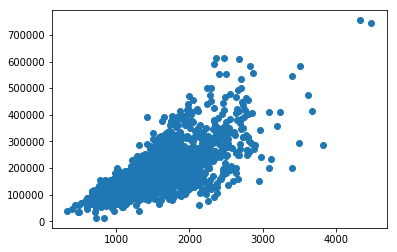

In [5]:
# GrLivArea (Above grade (ground) living area square feet)
plt.scatter(data_df['Gr Liv Area'].values, data_df['SalePrice'].values)
plt.show()

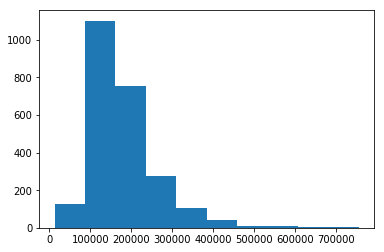

In [6]:
plt.hist(data_df['SalePrice'])
plt.show()

Dropping the Features 'Order' and 'PID'

In [7]:
data_df.drop(['Order', 'PID'], axis=1, inplace = True)

Adding the log(SalePrice)

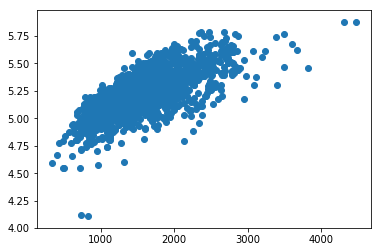

In [8]:
# Add a LogSalePrice variable to the DataFrame
data_df['LogSalePrice'] = np.log10(data_df['SalePrice'])

# GrLivArea (Above grade (ground) living area square feet)
plt.scatter(data_df['Gr Liv Area'].values, data_df['LogSalePrice'].values)
plt.show()

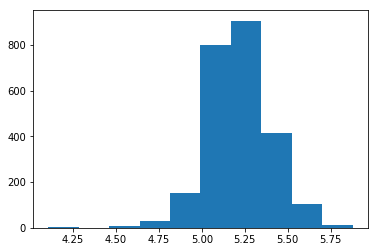

In [9]:
plt.hist(data_df['LogSalePrice'])
plt.show()

Filling factor

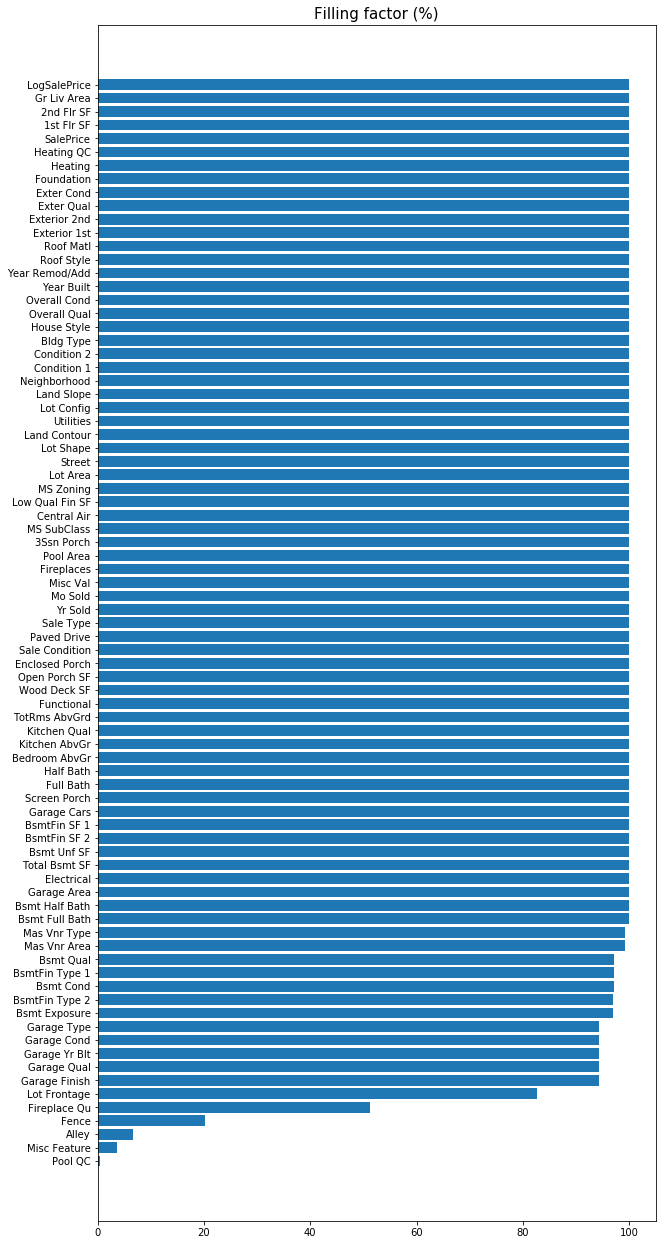

In [10]:
def filling_factor(data_df):
    missing_df = data_df.isnull().sum(axis=0).reset_index()
    missing_df.columns = ['column_name', 'missing_count']
    missing_df['filling_factor'] = (data_df.shape[0]-missing_df['missing_count'])/data_df.shape[0]*100
    missing_df = missing_df.sort_values('filling_factor').reset_index(drop = True)
    return missing_df
#____________________________________
missing_df = filling_factor(data_df)
missing_df[missing_df['filling_factor'] == 0]

col_filling = filling_factor(data_df)

y_axis  = list(col_filling['filling_factor'])
x_axis  = [i for i in range(len(col_filling))]
x_label = list(col_filling['column_name'])
fig = plt.figure(figsize=(10, 22))
plt.yticks(x_axis, x_label)
plt.title('Filling factor (%)', fontsize = 15)
plt.barh(x_axis, y_axis)
plt.show()

In [11]:
col_filling

,column_name,missing_count,filling_factor
0,Pool QC,2417,0.453048
1,Misc Feature,2339,3.665568
2,Alley,2265,6.713344
3,Fence,1939,20.140033
4,Fireplace Qu,1186,51.153213
5,Lot Frontage,420,82.701812
6,Garage Finish,138,94.316310
7,Garage Qual,138,94.316310
8,Garage Yr Blt,138,94.316310
9,Garage Cond,138,94.316310


In [12]:
#columns_to_remove = list(col_filling[col_filling['filling_factor'] < 95]['column_name'])
#columns_to_remove

In [13]:
#data_df.drop(columns_to_remove, axis = 1, inplace = True)

Pool QC by NA

In [14]:
data_df['Pool QC'].fillna(value= 'NA', inplace=True)

Misc Feature

In [15]:
data_df['Misc Feature'].fillna(value= 'NA', inplace=True)

Alley by NA

In [16]:
data_df['Alley'].fillna(value= 'NA', inplace=True)

Fence by NA

In [17]:
data_df['Fence'].fillna(value= 'NA', inplace=True)

Replacing Mas Vnr Type and Area

In [18]:
data_df['Mas Vnr Type'].fillna(value= 'None', inplace=True)
data_df['Mas Vnr Area'].fillna(value= 0, inplace=True)

Fireplace Quality

In [19]:
data_df['Fireplace Qu'].fillna(value= 'NA', inplace=True)

Replacing Bas

In [20]:
bas_features = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']

for col in bas_features:
    data_df[col].fillna(value= 'NA', inplace=True)

In [21]:
bas_features2 = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']

for col in bas_features:
    data_df[col].fillna(value= 0, inplace=True)

Lot Frontage

In [22]:
data_df['Lot Frontage'].describe()

count    2008.000000
mean       69.051295
std        22.821656
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

In [23]:
data_df['Lot Frontage'].fillna(value = data_df['Lot Frontage'].mean(), inplace = True)

Garage

In [24]:
data_df['Garage Type'].fillna(value = 'NA', inplace = True)
data_df['Garage Cond'].fillna(value = 'NA', inplace = True)
data_df['Garage Qual'].fillna(value = 'NA', inplace = True)
data_df['Garage Finish'].fillna(value = 'NA', inplace = True)
data_df['Garage Yr Blt'].fillna(value = 0, inplace = True)
data_df['Garage Cars'].fillna(value = 0, inplace = True)
data_df['Garage Area'].fillna(value = 0, inplace = True)

Basement

In [25]:
data_df['Bsmt Full Bath'].fillna(value = 0, inplace = True)
data_df['Bsmt Half Bath'].fillna(value = 0, inplace = True)

In [26]:
data_df['Electrical'].value_counts()

SBrkr    2221
FuseA     160
FuseF      38
FuseP       7
Mix         1
Name: Electrical, dtype: int64

In [27]:
data_df['Electrical'].fillna(value = 'SBrkr', inplace = True)

In [28]:
data_df['Total Bsmt SF'].fillna(value = 0, inplace = True)
data_df['Bsmt Unf SF'].fillna(value = 0, inplace = True)
data_df['BsmtFin SF 2'].fillna(value = 0, inplace = True)
data_df['BsmtFin SF 1'].fillna(value = 0, inplace = True)

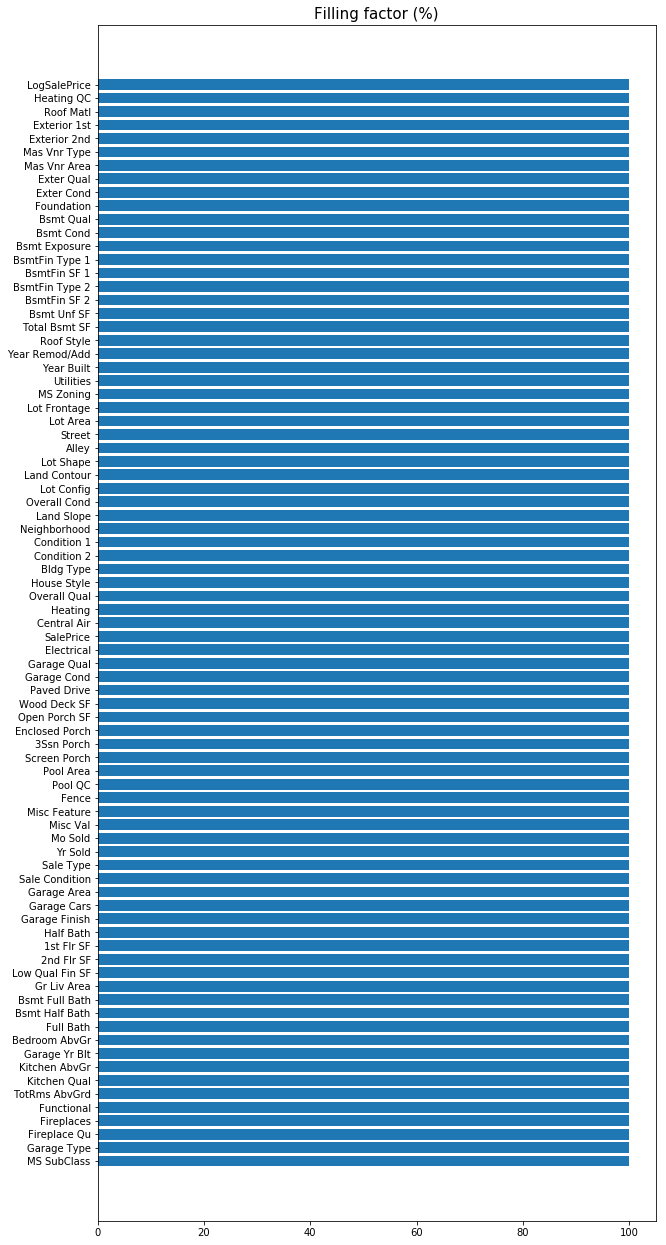

In [29]:
col_filling = filling_factor(data_df)

# plotting the data
y_axis  = list(col_filling['filling_factor'])
x_axis  = [i for i in range(len(col_filling))]
x_label = list(col_filling['column_name'])
fig = plt.figure(figsize=(10, 22))
plt.yticks(x_axis, x_label)
plt.title('Filling factor (%)', fontsize = 15)
#plt.axvline(x=95, linewidth=2, color = 'r')
plt.barh(x_axis, y_axis)
plt.show()

In [30]:
data_df.isnull().sum().sum()

0

Checking for duplicates

In [31]:
data_df.loc[data_df.duplicated(),:]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,LogSalePrice


Removing outliers

# Encoding, feature engineering

In [32]:
print('Data from years {} to {}.'.format(data_df['Yr Sold'].min(), data_df['Yr Sold'].max()))

Data from years 2006 to 2010.


In [33]:
# total sq_feet

data_df['total_surface'] = data_df['Total Bsmt SF'] + data_df['Gr Liv Area']

In [34]:
data_df.dtypes

MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
Foundation         object
Bsmt Qual          object
                   ...   
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu       object
Garage Type        object
Garage Yr Blt     float64
Garage Finis

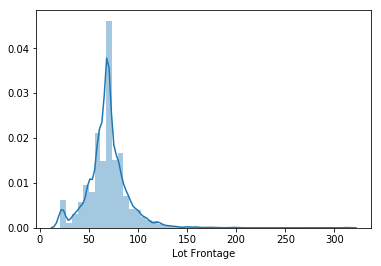

In [35]:
sns.distplot(data_df['Lot Frontage'])

In [36]:
data_df.dtypes

MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
Foundation         object
Bsmt Qual          object
                   ...   
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu       object
Garage Type        object
Garage Yr Blt     float64
Garage Finis

In [37]:
data_df[['MS SubClass', 'MS Zoning', 'Street', 'Alley',
    'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
    'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 
    'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 
    'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',  'Foundation', 'Bsmt Exposure',
   'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',  
    'Central Air', 'Electrical', 'Functional', 
   'Garage Type', 'Garage Finish',  
     'Paved Drive',  'Fence', 'Misc Feature', 'Sale Type', 
    'Sale Condition']] = data_df[['MS SubClass', 'MS Zoning', 'Street', 'Alley',
    'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
    'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 
    'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 
    'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',  'Foundation', 'Bsmt Exposure',
   'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',  
    'Central Air', 'Electrical', 'Functional', 
   'Garage Type', 'Garage Finish',  
     'Paved Drive',  'Fence', 'Misc Feature', 'Sale Type', 
    'Sale Condition']].apply(pd.Categorical)

In [38]:
data_df['Exter Qual'] = pd.Categorical(data_df['Exter Qual'], ordered=True, categories=['Fa','TA','Gd','Ex'])
data_df['Exter Cond'] = pd.Categorical(data_df['Exter Cond'], ordered=True, categories=['Po','Fa','TA','Gd','Ex'])
data_df['Bsmt Qual'] = pd.Categorical(data_df['Bsmt Qual'], ordered=True, categories=['No basement','Fa','TA','Gd','Ex'])
data_df['Bsmt Cond'] = pd.Categorical(data_df['Bsmt Cond'], ordered=True, categories=['No basement','Po','Fa','TA','Gd'])
data_df['Heating QC'] = pd.Categorical(data_df['Heating QC'], ordered=True, categories=['Po','Fa','TA','Gd','Ex'])
data_df['Kitchen Qual'] = pd.Categorical(data_df['Kitchen Qual'], ordered=True, categories=['Fa','TA','Gd','Ex'])
data_df['Fireplace Qu'] = pd.Categorical(data_df['Fireplace Qu'], ordered=True, categories=['No fireplace','Po','Fa','TA','Gd','Ex'])
data_df['Garage Qual'] = pd.Categorical(data_df['Garage Qual'], ordered=True, categories=['No garage','Po','Fa','TA','Gd','Ex'])
data_df['Garage Cond'] = pd.Categorical(data_df['Garage Cond'], ordered=True, categories=['No garage','Po','Fa','TA','Gd','Ex'])
data_df['Pool QC'] = pd.Categorical(data_df['Pool QC'], ordered=True, categories=['No pool','Fa','Gd','Ex'])

In [39]:
encoded_df = pd.get_dummies(data_df, columns=['Sale Condition'], prefix=['condition'])

In [40]:
encoded_df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Sale Type,SalePrice,LogSalePrice,total_surface,condition_Abnorml,condition_AdjLand,condition_Alloca,condition_Family,condition_Normal,condition_Partial
0,60,RL,69.051295,8795,Pave,NA,IR1,Lvl,AllPub,Inside,...,WD,236000,5.372912,3208.0,0,0,0,0,1,0
1,20,RL,75.000000,10170,Pave,NA,Reg,Lvl,AllPub,Corner,...,WD,155000,5.190332,1791.0,0,0,0,0,1,0
2,160,RM,21.000000,2001,Pave,NA,Reg,Lvl,AllPub,Inside,...,WD,75000,4.875061,1638.0,0,0,0,0,1,0
3,20,RL,70.000000,10552,Pave,NA,IR1,Lvl,AllPub,Inside,...,WD,165500,5.218798,3098.0,0,0,0,0,1,0
4,190,RM,60.000000,10120,Pave,NA,IR1,Bnk,AllPub,Inside,...,WD,122000,5.086360,2814.0,0,0,0,0,1,0


# Models

# Simple Model (3 variables)


In [41]:
df = encoded_df[['LogSalePrice','total_surface','condition_Abnorml','condition_AdjLand','condition_Alloca',
                'condition_Family','condition_Normal','condition_Partial']]

In [43]:
from sklearn.model_selection import train_test_split

# Split into train/test sets
train_df, test_df = train_test_split(df, train_size=0.5, test_size=0.5, random_state=0)

print('Train DataFrame:', train_df.shape)
print('Test DataFrame:', test_df.shape)

Train DataFrame: (1214, 8)
Test DataFrame: (1214, 8)


In [44]:
# Create X/y variables
X_tr = train_df.drop('LogSalePrice', axis=1).values
y_tr = train_df['LogSalePrice'].values

X_te = test_df.drop('LogSalePrice', axis=1).values
y_te = test_df['LogSalePrice'].values

In [45]:
# Root Mean Square Error (RMSE)
def RMSE(y, y_pred):
    return np.sqrt(np.mean(np.square(y - y_pred)))

In [50]:
# Mean absolute error (MAE)
def MAE(y, y_pred):
    return np.mean(np.abs(10**y - 10**y_pred))

In [47]:
from sklearn.linear_model import LinearRegression

# Create a linear regression
lr = LinearRegression()

In [48]:
# Fit it to train data
lr.fit(X_tr, y_tr)

# Print coefficients
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)

Coefficients: [ 0.00018051 -0.07283537 -0.04068257  0.01880872 -0.06384536  0.03889329
  0.11966129]
Intercept: 4.7270319115861845


In [49]:
# Compute predictions
y_pred = lr.predict(X_te)

In [51]:
# Mean baseline
rmse_baseline = RMSE(y_te, np.mean(y_te))

In [52]:
# Mean baseline
mae_baseline = MAE(y_te, np.mean(y_te))

In [53]:
# Linear regression
mae_lr = MAE(y_te, y_pred)

In [54]:
print('MAE baseline: {:.3f}'.format(mae_baseline))
print('MAE linear regression: {:.3f}'.format(mae_lr))

MAE baseline: 54447.411
MAE linear regression: 28738.204


In [56]:
# Linear regression
rmse_lr = RMSE(y_te, y_pred)

In [57]:
print('RMSE baseline: {:.3f}'.format(rmse_baseline))
print('RMSE linear regression: {:.3f}'.format(rmse_lr))

RMSE baseline: 0.176
RMSE linear regression: 0.099


# Intermediate Model (10 - 30 variables) + Ridge Regression

# Complex Model (All the variables)

# Compute predictions